<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/PricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

In [17]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.use_inf_as_na = True

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [30]:
# Загрузка данных
# превратим дату в индекс и сделаем изменение постоянным
# превратим дату (наш индекс) в объект datetime
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PricePredict/price.csv', delimiter=';', index_col = 'date', parse_dates = True)

In [31]:
df.head()

,codeprovider,itemnumber,unit,count,price,summa,country,analitika,expenses
date,,,,,,,,,
2016-08-19,01373,ПАЛ0011,кг,510.00000,292.14460,148993.74000,NaN,NaN,NaN
2016-08-19,02076,ППЛ065,кг,375.90000,134.83600,50684.84000,Россия,NaN,NaN
2016-09-29,02076,ППЛ055,кг,2911.70000,130.77810,380786.62000,Россия,NaN,NaN
2016-09-29,02076,ППЛ055,кг,538.76000,162.41490,87502.63000,Россия,NaN,NaN
2016-09-29,02076,ППЛ057,кг,306.12000,130.56880,39969.72000,Россия,NaN,NaN


# Изменение шага временного ряда, сдвиг и скользящее среднее

In [32]:
# изменим шаг наших данных; например, посмотрим средние данные по годам
df.resample(rule = 'AS').mean().head()

<ipython-input-32-02c7b66c2756>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,count,price,summa
date,,,
2016-01-01,1271.15131,156.27452,193628.86152
2017-01-01,1259.37827,147.42368,183593.30506
2018-01-01,1601.72855,176.82806,258652.87003
2019-01-01,2183.36763,177.58035,291929.59221
2020-01-01,2211.39630,177.52322,291463.40805


In [33]:
# произведем сдвиг на два периода (в данном случае месяца) вперед
df.shift(2, axis = 0).head()

,codeprovider,itemnumber,unit,count,price,summa,country,analitika,expenses
date,,,,,,,,,
2016-08-19,None,None,None,NaN,NaN,NaN,None,None,None
2016-08-19,None,None,None,NaN,NaN,NaN,None,None,None
2016-09-29,01373,ПАЛ0011,кг,510.00000,292.14460,148993.74000,NaN,NaN,NaN
2016-09-29,02076,ППЛ065,кг,375.90000,134.83600,50684.84000,Россия,NaN,NaN
2016-09-29,02076,ППЛ055,кг,2911.70000,130.77810,380786.62000,Россия,NaN,NaN


In [35]:
# рассчитаем скользящее среднее для трех предыдущих месяцев
df.rolling(window = 3).mean().head()

<ipython-input-35-092b3664d87e>:2: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['analitika', 'codeprovider', 'country', 'expenses', 'itemnumber',
       'unit'],
      dtype='object')



,count,price,summa
date,,,
2016-08-19,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN
2016-09-29,1265.86667,185.91957,193488.40000
2016-09-29,1275.45333,142.67633,172991.36333
2016-09-29,1252.19333,141.25393,169419.65667


# Построение графиков

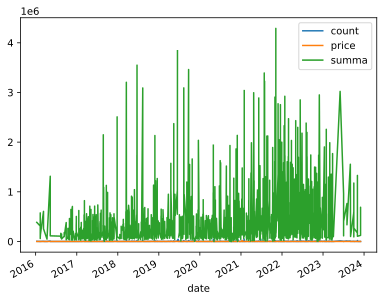

In [36]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
df.plot();

In [37]:
# изменим размер графика, уберем легенду и добавим подписи
ax = df.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров');

NameError: ignored

# Старое

In [ ]:
# Изучение данных
print(df.shape)  # размер данных
print("\n----------------------------------------")
print(df.columns)  # названия столбцов
print("\n----------------------------------------")
print(df.describe())  # описательные статистики
print("\n----------------------------------------")
print(df.isnull().sum())  # проверка на пропущенные значения
print("\n----------------------------------------")
print(df.duplicated().sum())  # проверка на дубликаты

In [7]:
# удаляем строки с пропущенными значениями
df = df.dropna(subset=['count'])

In [ ]:
print(df.isnull().sum())

In [ ]:
# Построим матрицу корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# df = pd.read_csv('hour_online.csv', index_col=['Time'], parse_dates=['Time'])
plotly_df(df, title = "Online users")

In [11]:
# "date" в качестве индекса датафрейма, чтобы преобразовать его в временной ряд.
df = df.set_index('date')

In [ ]:
# график временного ряда, чтобы оценить его характеристики, такие как тренд, сезонность и шум.
plt.plot(df['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()